In [ ]:
using LinearAlgebra
using Distributions
using Plots
using LaTeXStrings
using Printf
using FileIO
import JLD2

In [ ]:
using DataFrames
using StatsPlots

In [ ]:
using Revise
using Newtrinos
using Newtrinos.osc

In [ ]:
using Pkg
Pkg.status() 

Status `~/.julia/environments/myenv/Project.toml`
⌃ [13f3f980] CairoMakie v0.13.6
  [7073ff75] IJulia v1.27.0
  [5b289081] Newtrinos v1.0.0-DEV `~/Newtrinos.jl`
⌃ [295af30f] Revise v3.7.5
Info Packages marked with ⌃ have new versions available and may be upgradable.


In [ ]:
osc_cfg = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.NNM(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc = Newtrinos.osc.configure(osc_cfg)

Newtrinos.osc.Osc(OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}(NNM(ThreeFlavour(:NO)), SI(), Basic(), Newtrinos.osc.All()), (θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761, δCP = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, m₀ = 0.01, N = 20.0, r = 1.0), (θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = Uniform{Float64}(a=0.1, b=0.2), θ₂₃ = Uniform{Float64}(a=0.5235987755982988, b=1.0471975511965976), δCP = Uniform{Float64}(a=0.0, b=6.283185307179586), Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = Uniform{Float64}(a=0.002, b=0.003), m₀ = Uniform{Float64}(a=0.001, b=1.0), N = Uniform{Float64}(a=1.0, b=90.0), r = Uniform{Float64}(a=1.0e-8, b=1.0)), Newtrinos.osc.var"#get_Nnaturalness#47"(), Newtrinos.osc.var"#osc_prob#39"{Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}}}(Newtrinos.osc.var"#osc_prob#37#40"{OscillationConfig{NNM, SI, Basic, Newtrinos.osc.All}}(OscillationC

In [ ]:

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics = (; osc, atm_flux, earth_layers);

In [ ]:
experiments = (
 
    kamland = Newtrinos.kamland.configure(physics),
);

[ Info: Loading kamland data


In [ ]:
p = Newtrinos.get_params(experiments)

(N = 20.0, kamland_energy_scale = 0.0, kamland_flux_scale = 0.0, kamland_geonu_scale = 0.0, m₀ = 0.01, r = 1.0, Δm²₂₁ = 7.53e-5, Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = 0.5872523687443223, θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

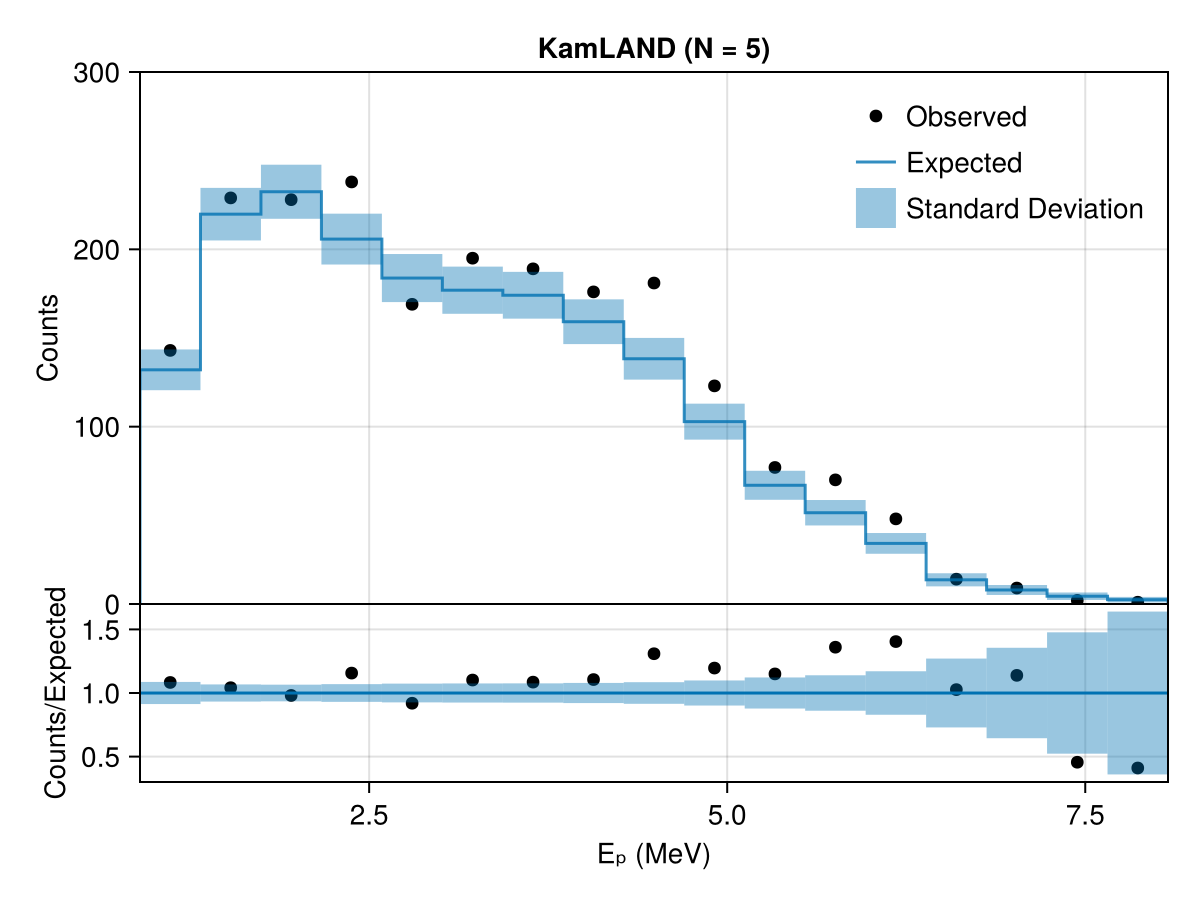

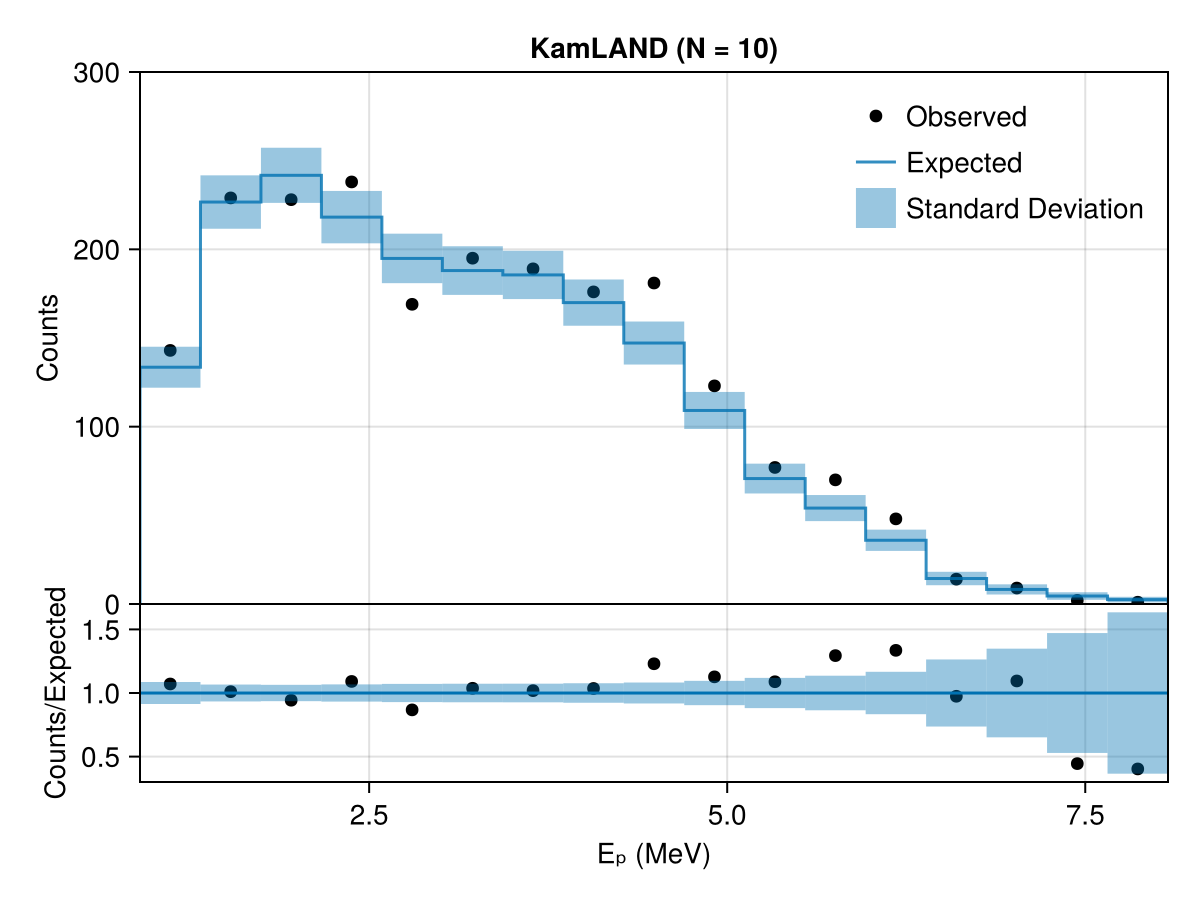

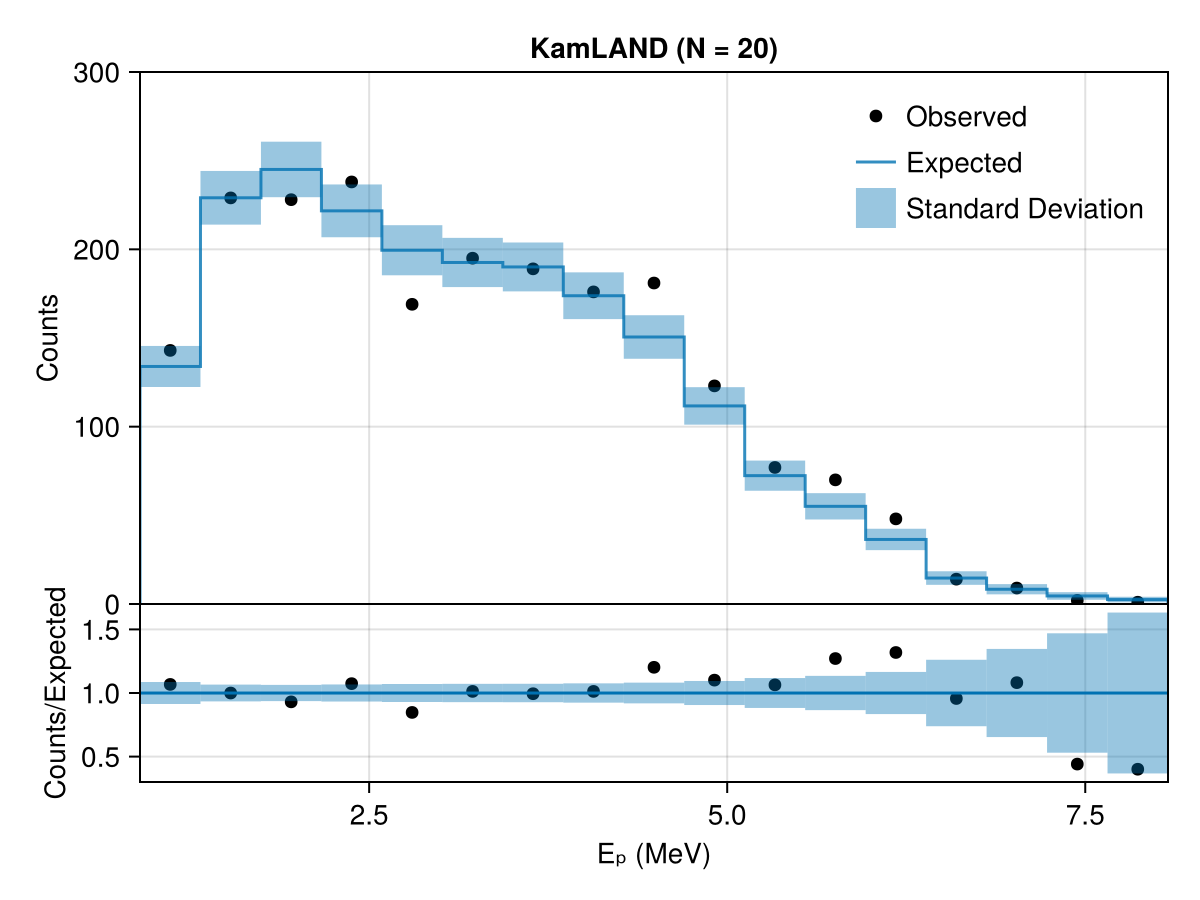

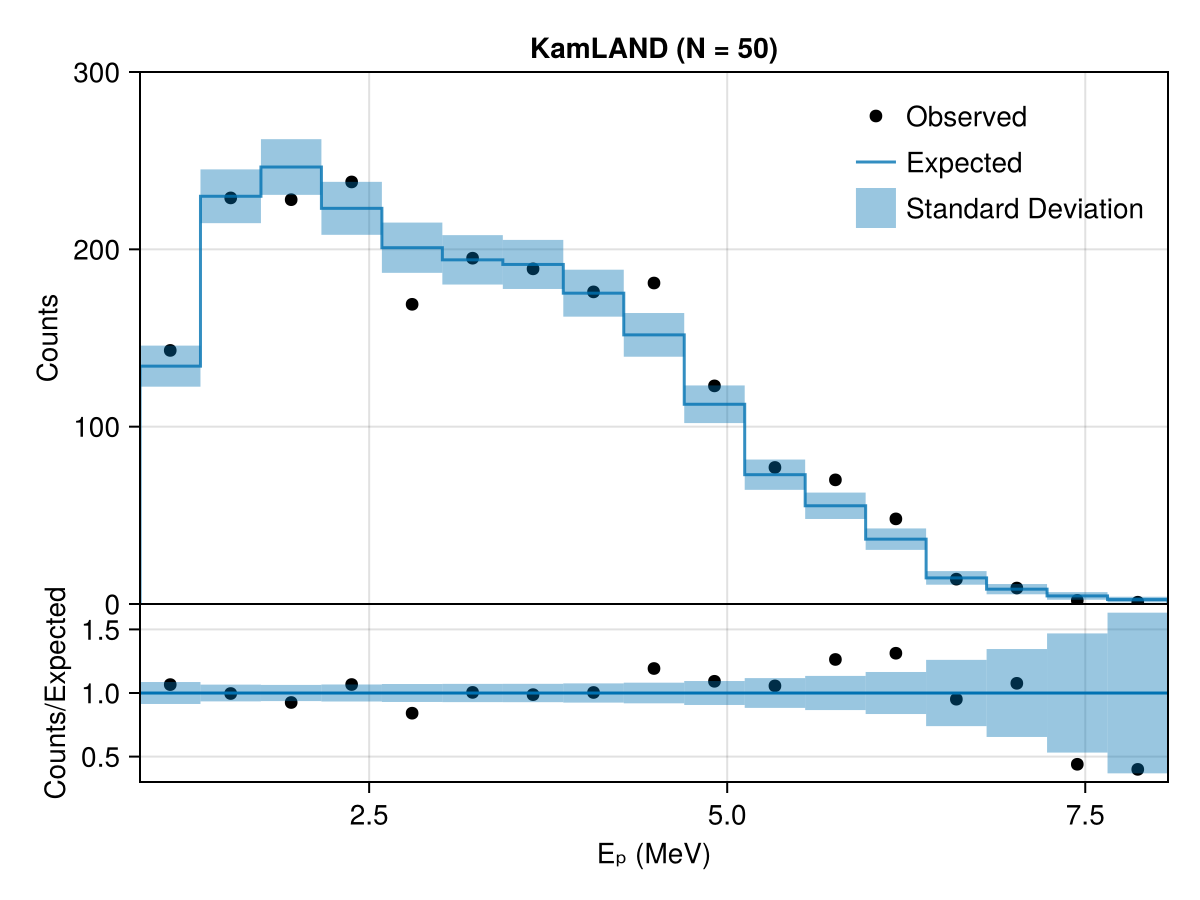

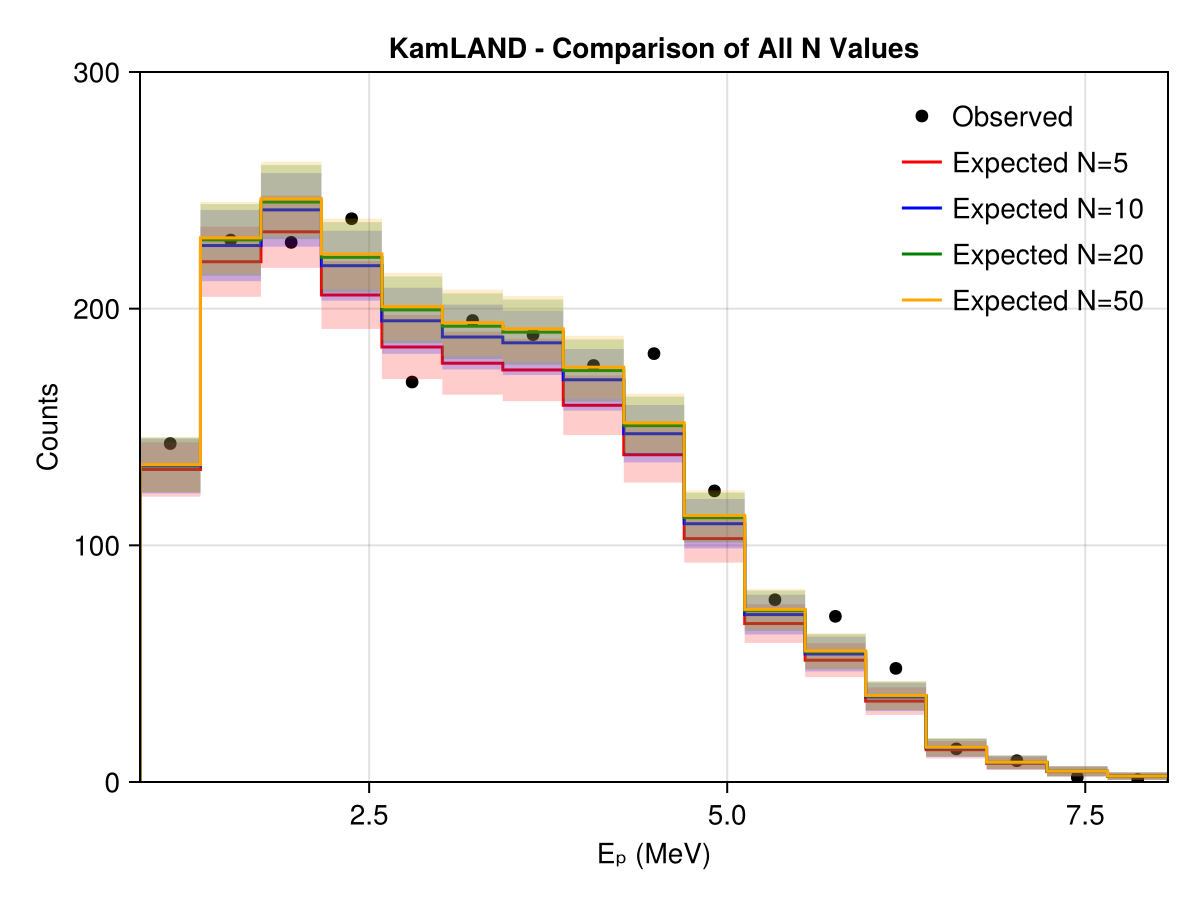

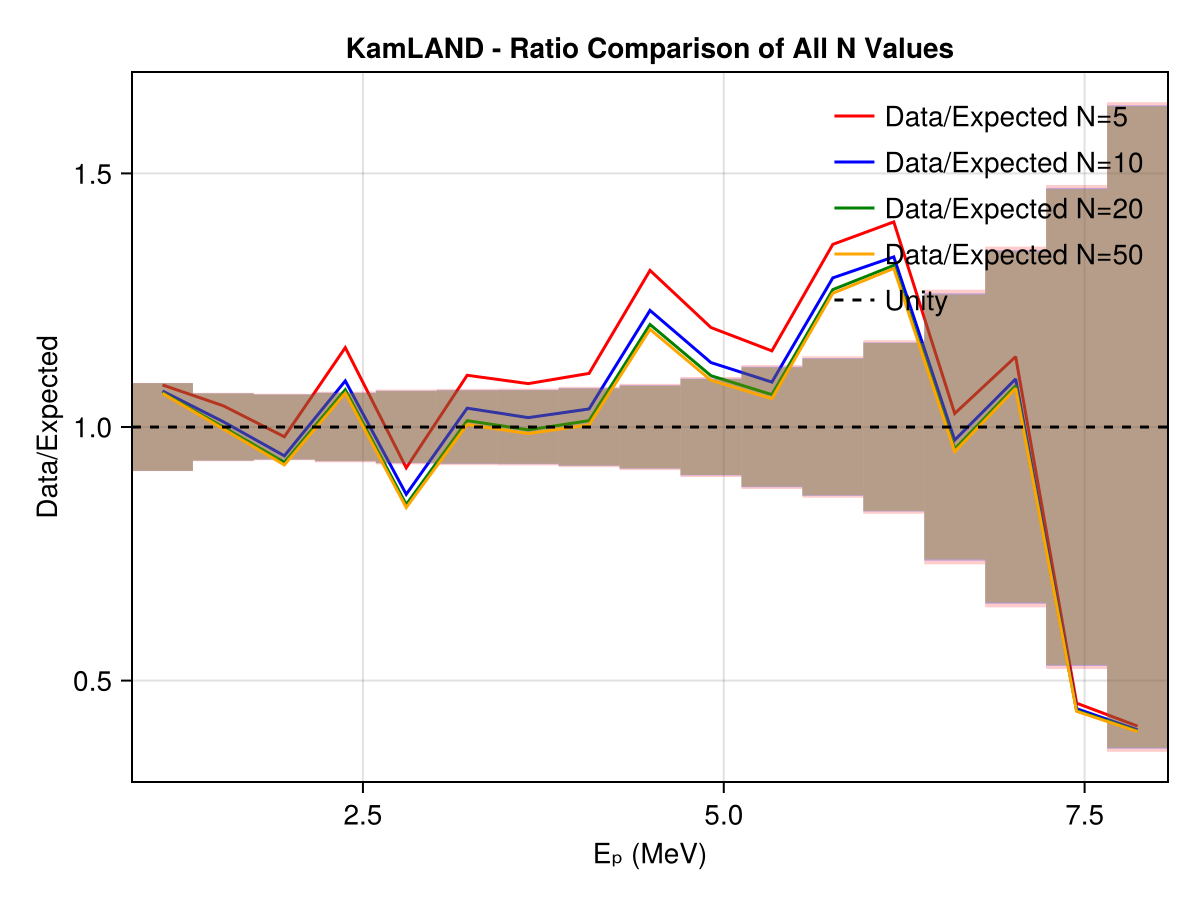

LoadError: MethodError: no method matching show(::IOContext{Base64.Base64EncodePipe}, ::MIME{Symbol("image/png")}, ::Nothing)
The function `show` exists, but no method is defined for this combination of argument types.

[0mClosest candidates are:
[0m  show(::IO, [91m::MIME{Symbol("text/csv")}[39m, ::Any)
[0m[90m   @[39m [36mDelimitedFiles[39m [90m~/.julia/packages/DelimitedFiles/aGcsu/src/[39m[90m[4mDelimitedFiles.jl:834[24m[39m
[0m  show(::IO, ::MIME, [91m::Union{Figure, Makie.FigureAxisPlot, Scene}[39m; backend, update)
[0m[90m   @[39m [32mMakie[39m [90m~/.julia/packages/Makie/dYDv2/src/[39m[90m[4mdisplay.jl:247[24m[39m
[0m  show(::IO, [91m::MIME{Symbol("text/tab-separated-values")}[39m, ::Any)
[0m[90m   @[39m [36mDelimitedFiles[39m [90m~/.julia/packages/DelimitedFiles/aGcsu/src/[39m[90m[4mDelimitedFiles.jl:835[24m[39m
[0m  ...


In [ ]:
img = experiments.kamland.plot(p)
display("image/png", img)
#save("/home/sofialon/Newtrinos.jl/natural plot/kamland/kamland_NNM_20.png", img)

In [ ]:

all_priors = Newtrinos.get_priors(experiments)


vars_to_scan = (θ₁₂=31,   Δm²₂₁ =31)  

modified_priors = (
    N =p.N, 
    m₀= p.m₀,
    r = p.r,
    
   
  

    Δm²₂₁ = all_priors.Δm²₂₁,  
    Δm²₃₁ = p.Δm²₃₁ , 
    δCP = p.δCP,    
    θ₁₂ = all_priors.θ₁₂,    
    θ₁₃= p.θ₁₃,       
    θ₂₃ = p.θ₂₃   
    

)


(N = 20.0, m₀ = 0.01, r = 1.0, Δm²₂₁ = Uniform{Float64}(a=6.5e-5, b=9.0e-5), Δm²₃₁ = 0.0024752999999999997, δCP = 1.0, θ₁₂ = Uniform{Float64}(a=0.4205343352839651, b=0.7853981633974483), θ₁₃ = 0.1454258194533693, θ₂₃ = 0.8556288707523761)

In [ ]:

likelihood = Newtrinos.generate_likelihood(experiments);


In [ ]:

result = Newtrinos.scan(likelihood, modified_priors, vars_to_scan, p)

Progress: 100%|█████████████████████████████████████████| Time: 0:20:57


NewtrinosResult((θ₁₂ = [0.4205343352839651, 0.4326964628877479, 0.44485859049153065, 0.4570207180953134, 0.4691828456990962, 0.48134497330287895, 0.4935071009066617, 0.5056692285104445, 0.5178313561142273, 0.52999348371801  …  0.6759390149634033, 0.6881011425671861, 0.7002632701709689, 0.7124253977747517, 0.7245875253785344, 0.7367496529823172, 0.7489117805861, 0.7610739081898827, 0.7732360357936655, 0.7853981633974483], Δm²₂₁ = [6.5e-5, 6.583333333333333e-5, 6.666666666666666e-5, 6.75e-5, 6.833333333333333e-5, 6.916666666666666e-5, 7.0e-5, 7.083333333333332e-5, 7.166666666666667e-5, 7.25e-5  …  8.25e-5, 8.333333333333333e-5, 8.416666666666668e-5, 8.5e-5, 8.583333333333334e-5, 8.666666666666667e-5, 8.750000000000001e-5, 8.833333333333334e-5, 8.916666666666667e-5, 9.0e-5]), (N = [20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0; … ; 20.0 20.0 … 20.0 20.0; 20.0 20.0 … 20.0 20.0], kamland_energy_scale = [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], kamland_

In [ ]:
#likelihood = Newtrinos.generate_likelihood(experiments);
#result = Newtrinos.scan(likelihood, Newtrinos.get_priors(experiments), (θ₁₃=31, Δm²₃₁=31), p)
#result = Newtrinos.profile(likelihood,  Newtrinos.get_priors(experiments), (r=31, m₀=31), p; gradient_map=false)

In [ ]:
JLD2.@save "scan_kamland_deltatheta_NNM_20.jld2" result

In [ ]:
using CairoMakie

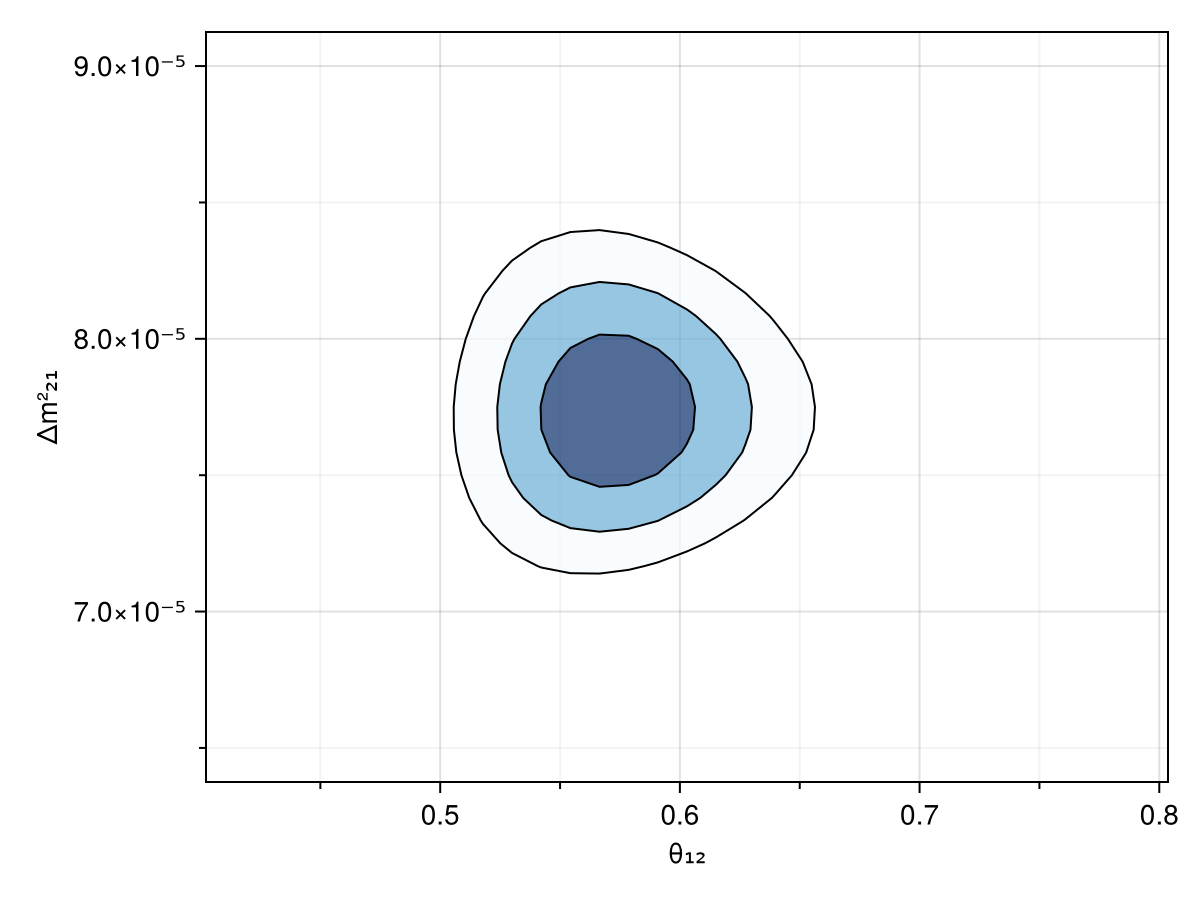

In [ ]:
img = CairoMakie.plot(result)
display("image/png", img)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/kamland_deltatheta_NNM_20.png", img)


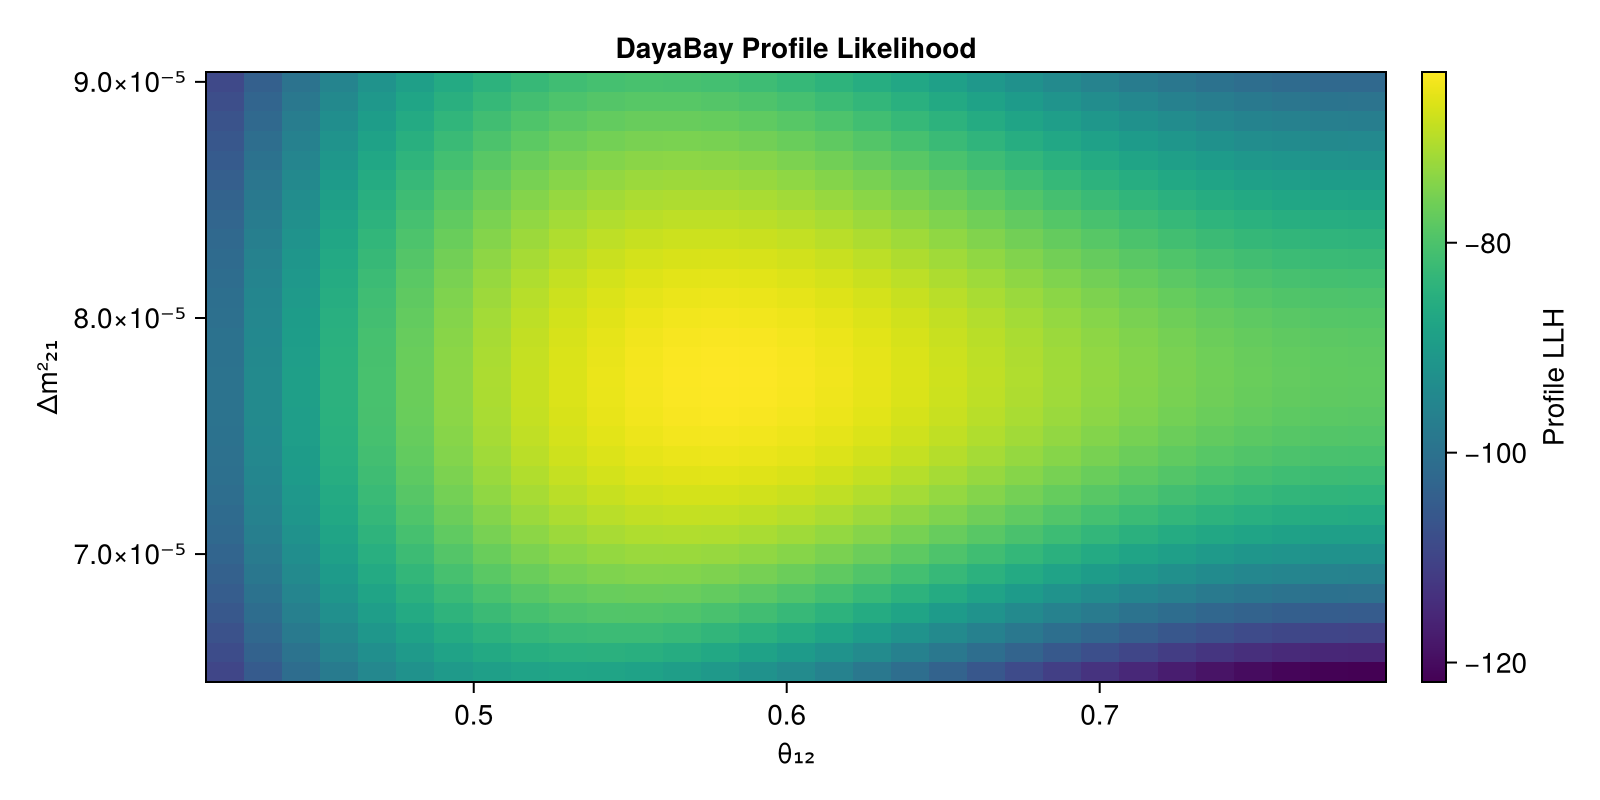

In [ ]:
llh_data = Float64.(result.values.llh)


fig = Figure(size=(800, 400))

ax = Axis(fig[1,1], 
    xlabel=String(keys(result.axes)[1]), 
    ylabel=String(keys(result.axes)[2]), 
    title="DayaBay Profile Likelihood"
)

hm = CairoMakie.heatmap!(ax, result.axes[1], result.axes[2], result.values.llh)
Colorbar(fig[1,2], hm, label="Profile LLH")

#save("/home/sofialon/Newtrinos.jl/natural_plot/dayabay_rN_NND_profthetadeltam_.png", fig)
fig

Likelihood ratio test


In [ ]:
JLD2.@load "scan_dayabay_thetadeltam_SM.jld2" result
ll_0 = result.values.llh

JLD2.@load "scan_dayabay_thetadeltam_NND_profN.jld2" result
ll_1 = result.values.llh

pvalue =Newtrinos.likelihood_ratio_test(ll_0,ll_1, 2)

ll_0: Any[-302.4716069851248 -299.3814874105783 -296.4203722706933 -293.59234495586077 -290.9012228039638 -288.35056712385074 -285.94369439814386 -283.68368793802586 -281.57340928265756 -279.61550867771734 -277.81243402826044 -276.16643779754367 -274.67958141218804 -273.35373683184406 -272.1905850449926 -271.19161135872866 -270.35809745648305 -269.69111030125646 -269.19148806087566 -268.8598233242585 -268.6964439622668 -268.70139206213855 -268.8744014299001 -269.21487420974427 -269.7218572126701 -270.39401857825914 -271.22962541301723 -272.22652305612775 -273.38211661851614 -274.6933554238578 -276.1567209506018; -292.6154096192527 -289.4012557669376 -286.3225331994417 -283.38344656945026 -280.58792640021977 -277.93964176186483 -275.4420141000042 -273.09823138122744 -270.9112617484946 -268.88386593278574 -267.0186077414477 -265.3178620348856 -263.78381970757397 -262.4184893028572 -261.22369500996587 -260.2010709126542 -259.35205147876366 -258.67785839617017 -258.1794839707194 -257.85767

1.0

Oscillations


In [ ]:

# STANDARD MODEL
E_range = range(0.002, 0.008, length=1000) 
L=180
L_vec = [L]

osc_cfg_SM = Newtrinos.osc.OscillationConfig(
    flavour=Newtrinos.osc.ThreeFlavour(),
    propagation=Newtrinos.osc.Basic(),
    states=Newtrinos.osc.All(),
    interaction=Newtrinos.osc.SI()
    )

osc_SM = Newtrinos.osc.configure(osc_cfg_SM)
 

atm_flux = Newtrinos.atm_flux.configure()
earth_layers = Newtrinos.earth_layers.configure()

physics_SM = (; osc=osc_SM, atm_flux, earth_layers);


experiments_SM = (
 
    kamland = Newtrinos.kamland.configure(physics_SM),
);

p_SM = Newtrinos.get_params(experiments_SM)

osc_prob_SM = Newtrinos.osc.get_osc_prob(osc_cfg_SM)


probab_SM = osc_prob_SM(collect(E_range), L_vec, p; anti=true)

[ Info: Loading kamland data


1000×1×3×3 Array{Float64, 4}:
[:, :, 1, 1] =
 0.5328444160207639
 0.46842294337211426
 0.44601848057264504
 0.467756510678217
 0.4420892446467301
 0.38401133675364607
 0.3765592159615382
 0.3933814518888332
 0.36071378400532866
 0.31176837265362123
 0.31188461926432903
 0.3247326053269489
 0.2921732382409402
 ⋮
 0.3934653699129192
 0.3894751475128693
 0.3855897175404817
 0.38183879300059226
 0.37825027491226954
 0.3748499564154767
 0.3716612558256643
 0.3687049811470129
 0.3659991281390004
 0.36355871360118874
 0.3613956451028241
 0.3595186279424389

[:, :, 2, 1] =
 0.19919667650791767
 0.37741478651874527
 0.3768714796109813
 0.21425417781045314
 0.2590383264579828
 0.4365481836656524
 0.3873309776457235
 0.22804256601417372
 0.305559075007893
 0.47654899019332786
 0.40491050123224387
 0.24644816100767905
 0.3305635797075912
 ⋮
 0.3601554079890415
 0.373165733277428
 0.38571566636984606
 0.3976712685441839
 0.4089060425145391
 0.41930228184703855
 0.4287523058304188
 0.437159567695219

In [ ]:
# NNATURALNESS WITH DIFFERENT N 


osc_prob = Newtrinos.osc.get_osc_prob(osc_cfg)

p= Newtrinos.get_params(experiments)
p_5 = merge(p, (N = ftype(5),))
p_10 = merge(p, (N = ftype(10),))
p_20 = merge(p, (N = ftype(20),))
p_50 = merge(p, (N = ftype(50),))

probab_5 = osc_prob(collect(E_range), L_vec, p_5; anti=true)
probab_10 = osc_prob(collect(E_range), L_vec, p_10; anti=true)
probab_20 = osc_prob(collect(E_range), L_vec, p_20; anti=true)
probab_50 = osc_prob(collect(E_range), L_vec, p_50; anti=true)

p_0 = merge(p, (r = ftype(0),))
p_025 = merge(p,  (r = ftype(0.25),))
p_05 = merge(p,  (r = ftype(0.5),))
p_1 = merge(p,  (r = ftype(1),))


probab_0 = osc_prob(collect(E_range), L_vec, p_0; anti=true)
probab_025 = osc_prob(collect(E_range), L_vec, p_025; anti=true)
probab_05 = osc_prob(collect(E_range), L_vec, p_05; anti=true)
probab_1 = osc_prob(collect(E_range), L_vec, p_1; anti=true)


1000×1×60×60 Array{Float64, 4}:
[:, :, 1, 1] =
 0.5272038635122095
 0.4666259452104434
 0.43964648142186236
 0.4610879000692712
 0.43944362979287954
 0.3810429502873477
 0.37106102193672685
 0.38849193352520206
 0.3576844798587261
 0.30826020210119837
 0.3110265398899121
 0.3207087703495282
 0.2894778675625026
 ⋮
 0.3881507719006072
 0.38404505390241617
 0.3831246956548601
 0.3810878605197967
 0.37654821118271176
 0.37164443719092655
 0.36589750445674973
 0.3670985839373824
 0.3615735807032305
 0.3620918678352312
 0.3600422452406896
 0.355101864400736

[:, :, 2, 1] =
 0.19735325573337925
 0.37336027989535997
 0.37114122940294375
 0.21059121650838047
 0.25631415476049435
 0.4304683678505976
 0.3844359958172673
 0.22659573856192874
 0.30400501398695323
 0.47174378573385534
 0.4009668388148786
 0.2446929214961688
 0.32930791271132254
 ⋮
 0.35781907932399926
 0.3690116265677039
 0.38334932161811974
 0.39407970867415343
 0.4065086719023375
 0.4156730965011012
 0.4243865437424921
 0.43253195

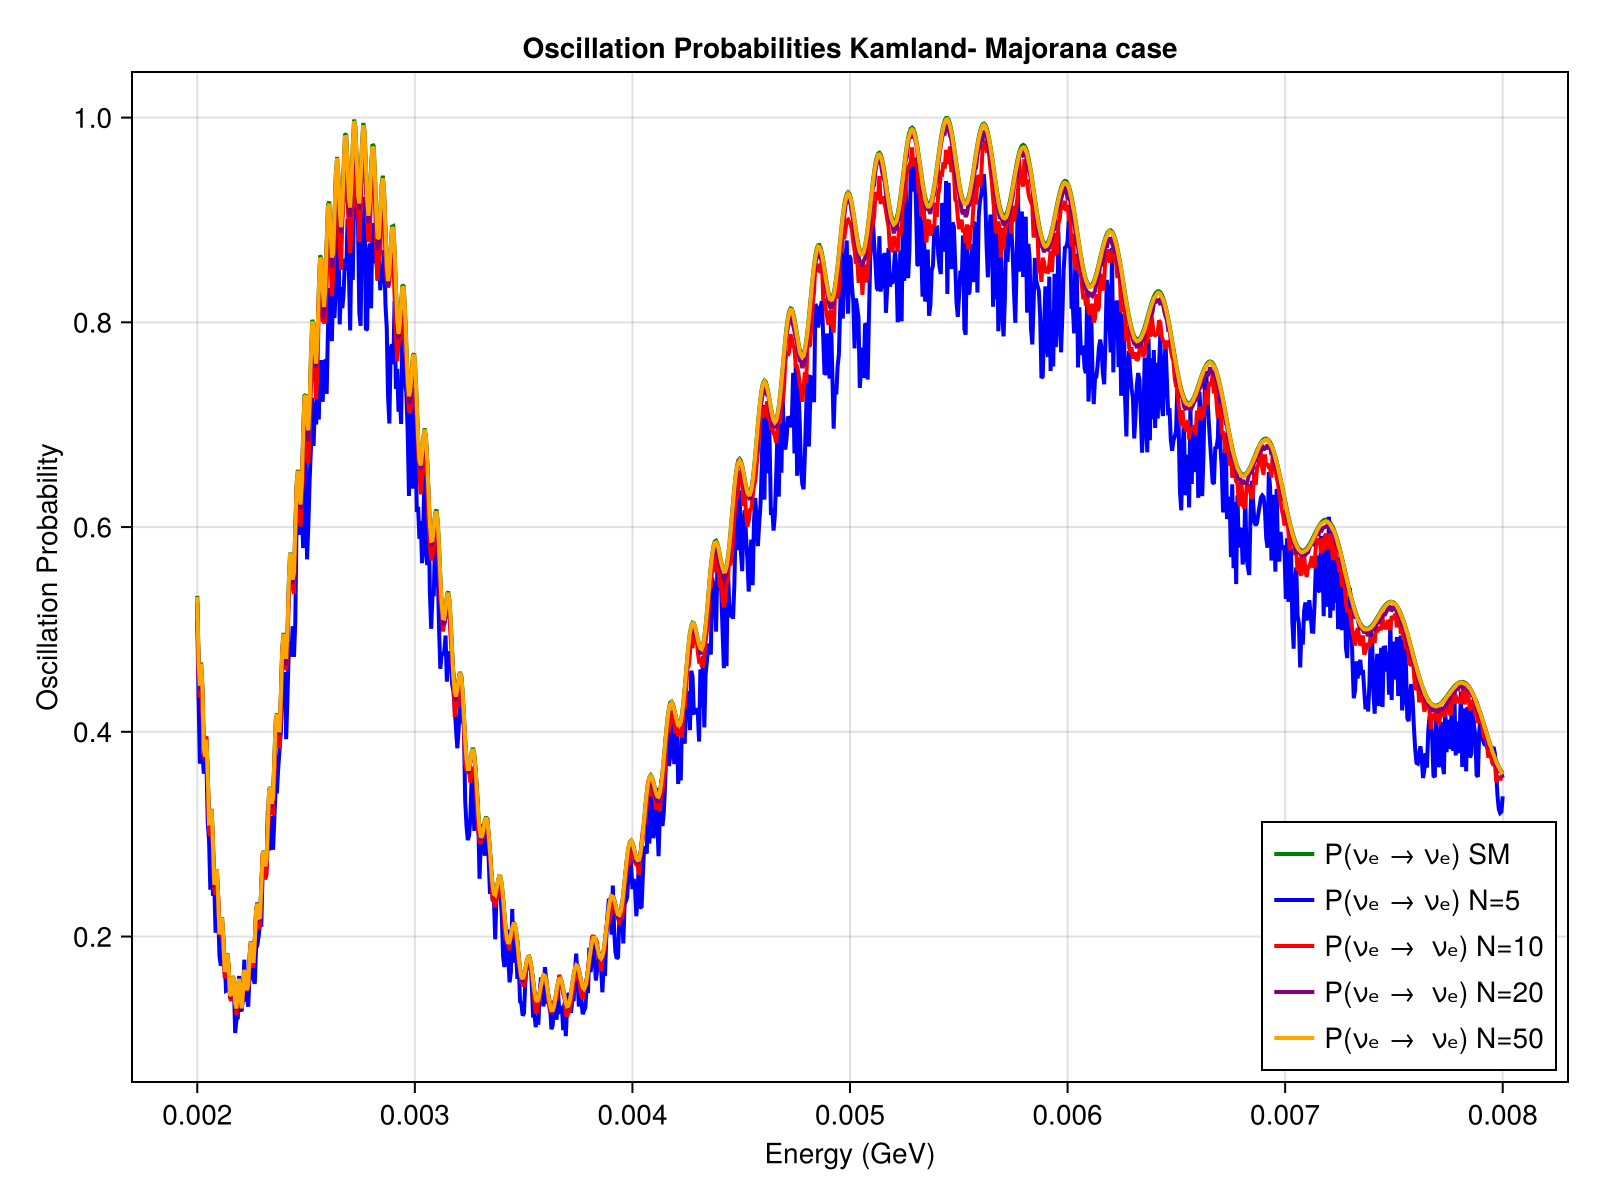

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Kamland- Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_5[:, 1, 1, 1], label="P(νₑ → νₑ) N=5", linewidth=2, color=:blue)
lines!(ax, E_range, probab_10[:, 1, 1, 1], label="P(νₑ →  νₑ) N=10", linewidth=2, color=:red)
lines!(ax, E_range, probab_20[:, 1, 1, 1], label="P(νₑ →  νₑ) N=20", linewidth=2, color=:purple)
lines!(ax, E_range, probab_50[:, 1, 1, 1], label="P(νₑ →  νₑ) N=50", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/osc_kamland_N_majorana.png", fig)

fig

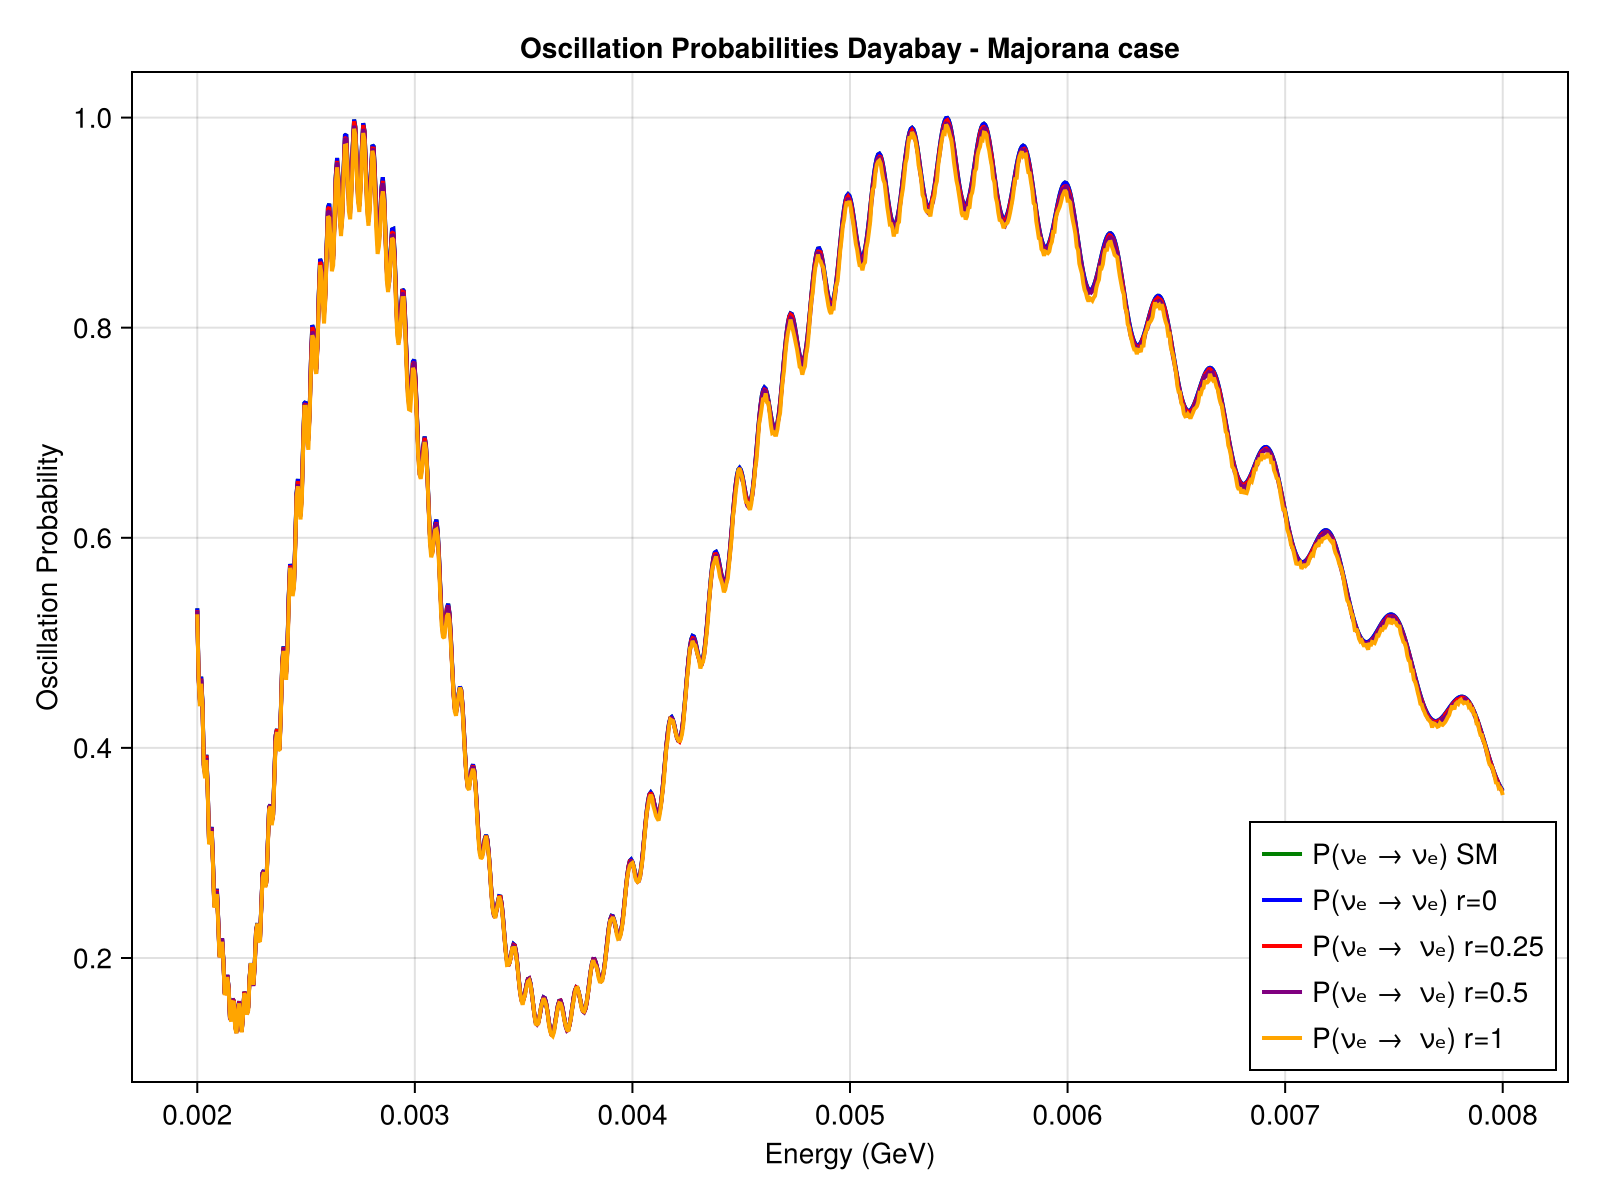

In [ ]:

fig = Figure(size=(800, 600))
ax = Axis(fig[1,1], 
    xlabel = "Energy (GeV)",
    ylabel = "Oscillation Probability", 
    title = "Oscillation Probabilities Dayabay - Majorana case"
)

# Plot the lines
lines!(ax, E_range, probab_SM[:, 1, 1, 1], label="P(νₑ → νₑ) SM", linewidth=2, color=:green)
lines!(ax, E_range, probab_0[:, 1, 1, 1], label="P(νₑ → νₑ) r=0", linewidth=2, color=:blue)
lines!(ax, E_range, probab_025[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.25", linewidth=2, color=:red)
lines!(ax, E_range, probab_05[:, 1, 1, 1], label="P(νₑ →  νₑ) r=0.5", linewidth=2, color=:purple)
lines!(ax, E_range, probab_1[:, 1, 1, 1], label="P(νₑ →  νₑ) r=1", linewidth=2, color=:orange)

# Add legend and set limits
axislegend(ax, position=:rb)
save("/home/sofialon/Newtrinos.jl/natural plot/kamland/osc_kamland_r_dirac.png", fig)

fig